## Common cost functions (linear models)

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


## Gradient Descent

Gradient descent is a generic optimization algorithm used to minimize a loss function. 

The general idea of gradient descent is to tweak parameters iteratively, reducing the error by calculating the gradient of the loss function for each parameter.

A *gradient* is a slope of a curve at any given point in a specified direction.

There are three types of gradient descent algorithms:

- **Batch gradient descent**
- **Stochastic gradient descent**
- **Mini-batch gradient descent**


### Key Differences Between the Methods

| Method            | Batch Size             | Gradient Computation             | Noise in Updates | Large $n$ | Hyperparameters | Scaling Required | Scikit-learn   |
|-------------------|------------------------|----------------------------------|------------------|-----------|-----------------|------------------|----------------|
| **Batch GD**      | Entire dataset         | Low noise, stable updates        | Low              | Slow      | 2               | Yes              | No             |
| **Stochastic GD** | 1 example              | High noise, erratic updates      | High             | Fast      | $\geq2$         | Yes              | `SGDRegressor` |
| **Mini-Batch GD** | Small batch (e.g., 10) | Moderate noise, balanced updates | Medium           | Fast      | $\geq2$         | Yes              | No             |

#### Formulas, for reference

Let's keep in mind that the gradient descent algorithm can be easily applied using code, but here's the math behind it.

Where:

- $\theta$ is the parameters of the models
- $\alpha$ is the learning rate
- $\nabla J(\theta)$ is the gradient of the cost function with respect to $\theta$. The $\nabla$ (nabla) symbol is a vector differential operator, $J$ is the cost function.

$$\theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \nabla J(\theta_{\text{old}})$$

The gradient of the cost function $\nabla J(\theta)$ is a vector containing all the partial derivatives (denoted by the symbol $\partial$) of the cost function with respect to each parameter $\theta_i$.

$$\nabla J(\theta) = \begin{bmatrix}
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix}$$

Basically *"what is the slope at this point if I check in this direction?"*

Applying this to MSE, the cost function for a Linear Regression model, where:

- $m$ is the number of instances in the dataset (the training set)
- $h_\theta(x)$ is the hypothesis function, using the model parameters $\theta$
- $x^{(i)}$ is the $i^{th}$ instance's feature vector
- $y^{(i)}$ is the $i^{th}$ instance's target value

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

And the gradient with respect to $\theta_j$ is:

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$

The parameters are updated as:

$$\theta_j := \theta_j - \alpha \cdot \frac{\partial J}{\partial \theta_j}$$

### Batch gradient descent

Batch gradient descent computes the gradient of the cost function on the *entire* training dataset.

Batch gradient descent guarantees convergence to the global minimum but can be computationally expensive and slow for large datasets.

`sklearn` does not have a function for batch GD.



#### Example - Batch gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('default')

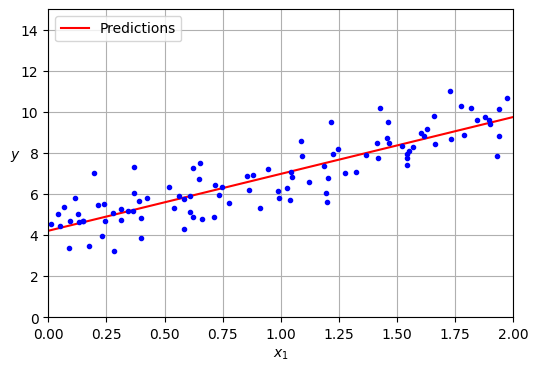

In [2]:
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best


plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the
solution, but it will take a long time. In the middle, the learning rate looks pretty
good: in just a few epochs, it has already converged to the solution. On the right,
the learning rate is too high: the algorithm diverges, jumping all over the place and
actually getting further and further away from the solution at every step

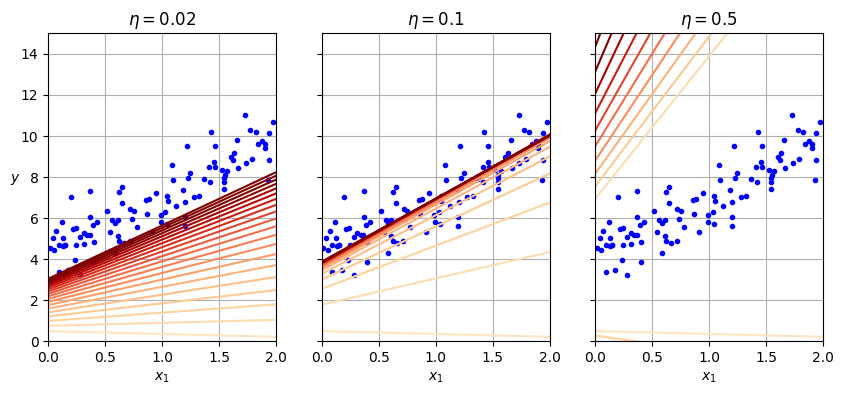

In [3]:
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()

## Stochastic gradient descent

Stochastic gradient descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

Working on a single instance at a time makes the algorithm much faster and a good option to work with huge data sets.

The downside is that due to its randomness, it's less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average.

Over time, it will end up very close to the minimum, but once it gets there, it will continue to bounce around, never settling down. Once the algorithm stops, the final parameter values are good, but not optimal.

It can be helpful when the cost function is very irregular.

#### Visualization of Stochastic Gradient Descent and Learning Schedules

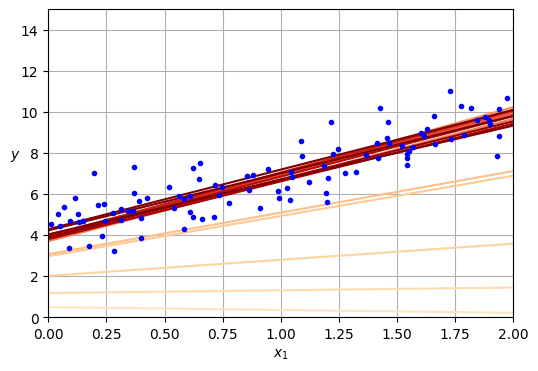

In [4]:
theta_path_sgd = []

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

#### Using `sklearn`'s `SGDRegressor`

In [5]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

It will return two numbers: the intercept and the slope.

- The intercept represents the baseline prediction when the input feature is zero.
- The slope represents the relationship between the input feature and the target variable.

In this case, if $x=0$, the model predicts $y=4.85$ and for each one unit increase in $x$, the model predicts an increase of $3.02$ in $y$.

In [6]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Mini-batch gradient descent

It's a compromise between batch and stochastic gradient descent: at each step, it computes the gradients on small random sets of instances called mini-batches.

The main advantage is that it can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

It's less erratic than stochastic gradient descent, especially with fairly large mini-batches. It may be harder for it to escape local minima (the minimum of the cost function within a small region of the parameter space).

### Visual comparison of the three gradient descent algorithms

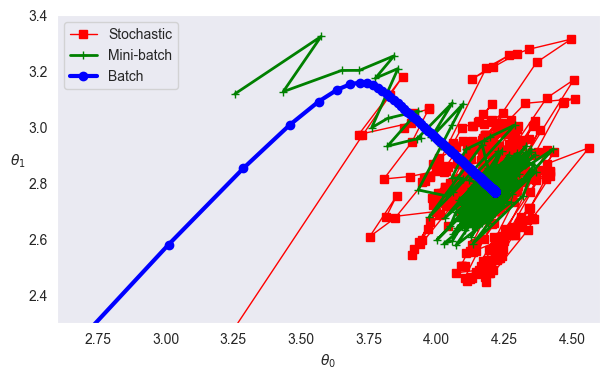

In [7]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

## Residuals

Often, for linear regression, it is a good idea to separately evaluate residuals ($y-\hat{y}$) and not just calculate performance metrics.

We're calculating the difference between the actual target value and the predicted target value.

### Practical examples

Let's consider the following data:

In [32]:
d_1 = {'x':[10.0, 8.0, 13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0], 'y':[8.04,6.95, 7.58, 8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.8]}
q_1 = pd.DataFrame(data=d_1)
q_1['pred_y'] = 3 + 0.5 * q_1['x']
q_1['residual'] = q_1['y'] - q_1['pred_y']

<Axes: xlabel='x', ylabel='y'>

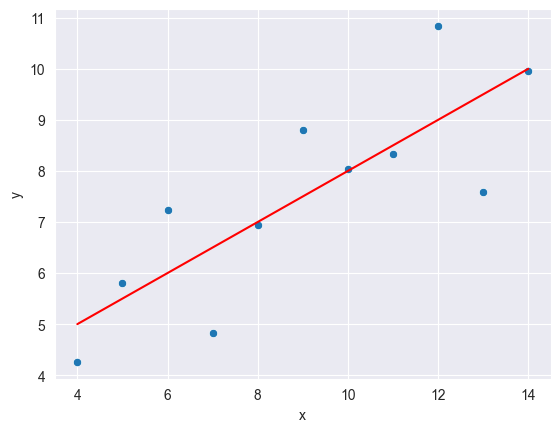

In [53]:
sns.scatterplot(data=q_1,x='x',y='y')
sns.lineplot(data=q_1,x='x',y='pred_y',color='red')

The residuals are the vertical distances between the observed values and the predicted values. They are the errors in the model.

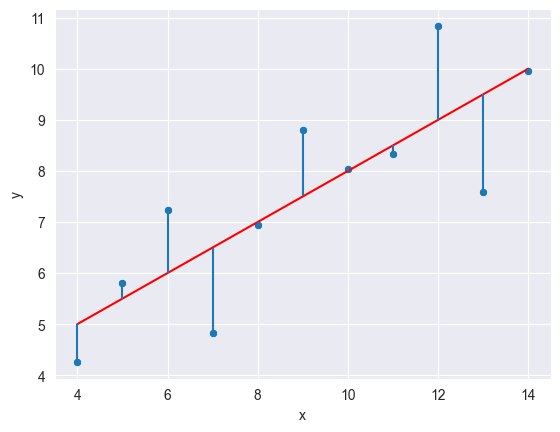

In [34]:
q_1['pred_y'] = 3 + 0.5 * q_1['x']
q_1['residual'] = q_1['y'] - q_1['pred_y']

sns.scatterplot(data=q_1,x='x',y='y')
sns.lineplot(data=q_1,x='x',y='pred_y',color='red')
plt.vlines(q_1['x'],q_1['y'],q_1['y']-q_1['residual'])

The distribution of the residual errors should be normally distributed.

<Axes: xlabel='residual', ylabel='Density'>

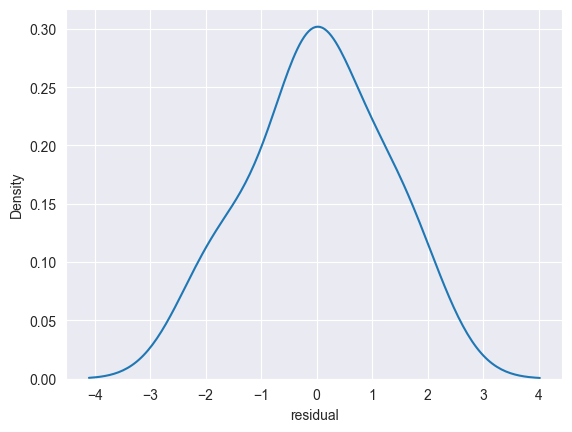

In [35]:
sns.kdeplot(q_1['residual'])

Alternatively, we can use `scipy` to check for normality if the normal distribution is difficult to interpret:

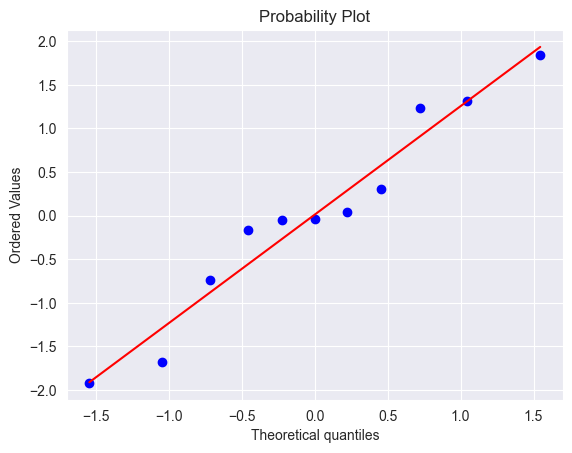

In [67]:
import scipy as sp
fig, ax = plt.subplots()
_ = sp.stats.probplot(q_1['residual'], plot=ax, fit=True)

We can also plot the residual points against the $y$ true value and this plot should look random.

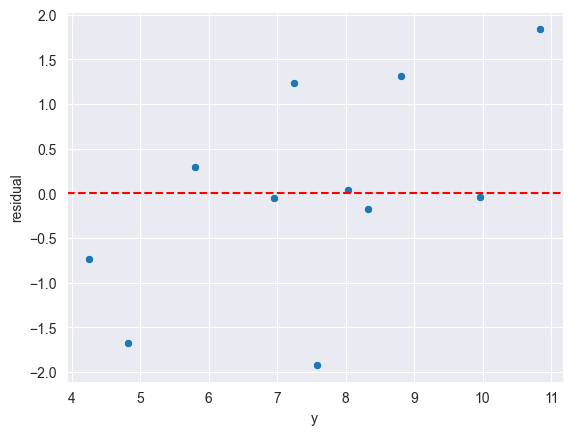

In [36]:
sns.scatterplot(data=q_1,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

Let's check now against datasets that are not valid for linear regression.

In [42]:
d_2 = {'x':[10.0, 8.0, 13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0], 'y':[9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74]}
q_2 = pd.DataFrame(data=d_2)
q_2['pred_y'] = 3 + 0.5 * q_2['x']
q_2['residual'] = q_2['y'] - q_2['pred_y']

<Axes: xlabel='x', ylabel='y'>

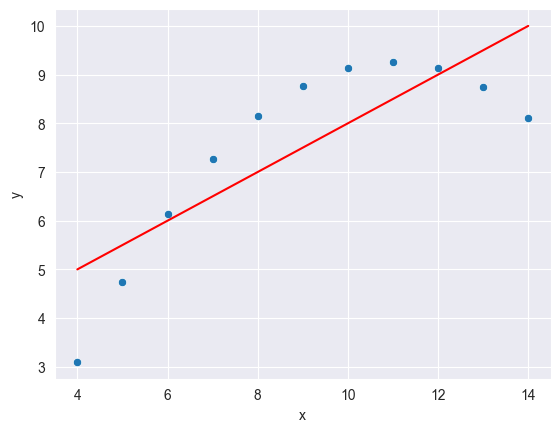

In [54]:
sns.scatterplot(data=q_2,x='x',y='y')
sns.lineplot(data=q_2,x='x',y='pred_y',color='red')

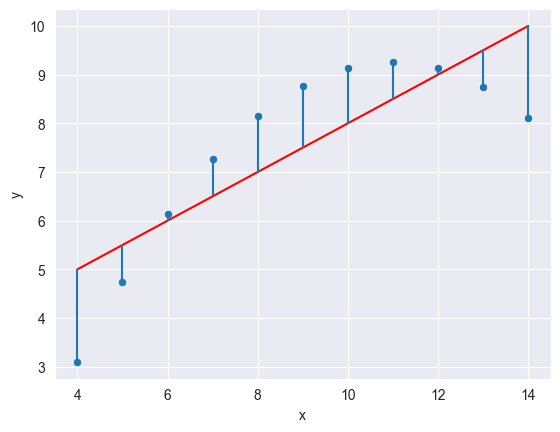

In [46]:
sns.scatterplot(data=q_2,x='x',y='y')
sns.lineplot(data=q_2,x='x',y='pred_y',color='red')
plt.vlines(q_2['x'],q_2['y'],q_2['y']-q_2['residual'])

The residuals are not normally distributed, but it doesn't look that bad.

<Axes: xlabel='residual', ylabel='Density'>

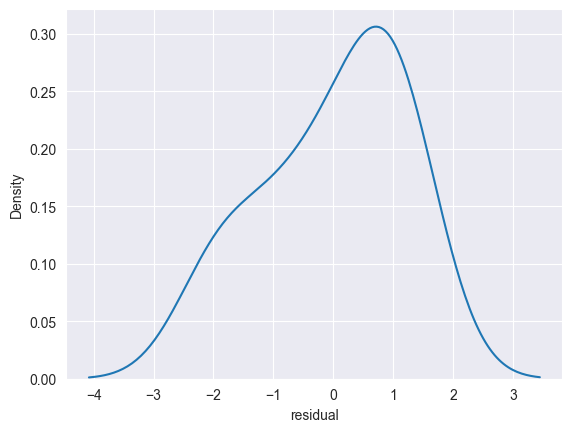

In [47]:
sns.kdeplot(q_2['residual'])

Whereas the residuals have a clear pattern

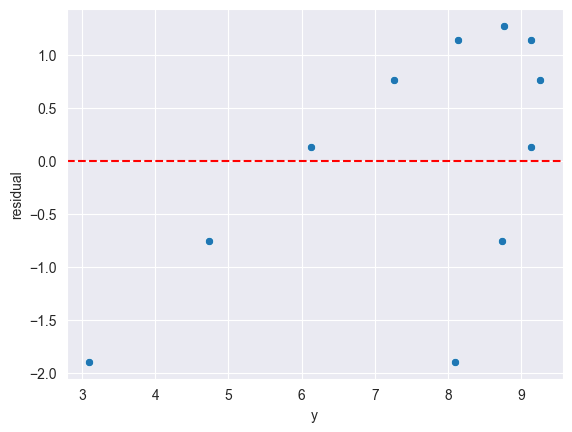

In [48]:
sns.scatterplot(data=q_2,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

Another example:

In [49]:
d_3 = {'x':[8,8,8,8,8,8,8,19,8,8,8], 'y':[6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89]}
q_3 = pd.DataFrame(data=d_3)
q_3['pred_y'] = 3 + 0.5 * q_3['x']
q_3['residual'] = q_3['y'] - q_3['pred_y']

<Axes: xlabel='x', ylabel='y'>

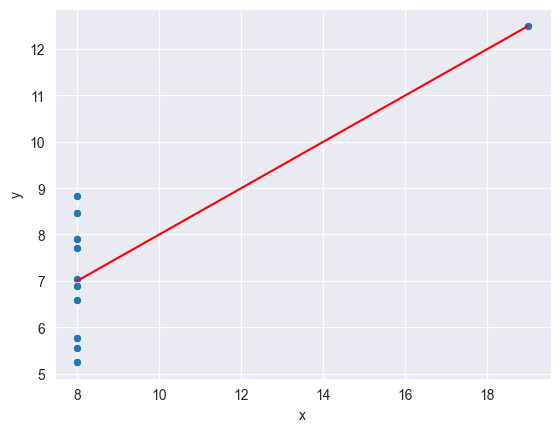

In [55]:
sns.scatterplot(data=q_3,x='x',y='y')
sns.lineplot(data=q_3,x='x',y='pred_y',color='red')

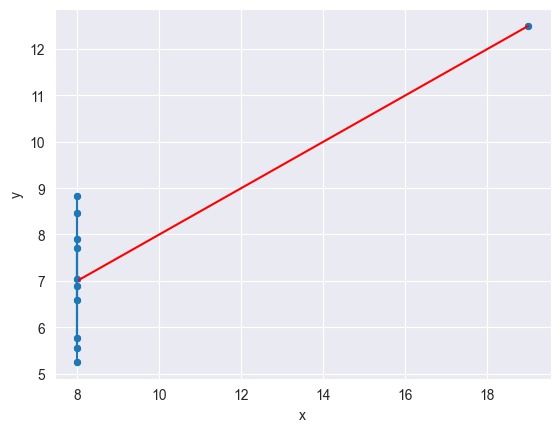

In [50]:
sns.scatterplot(data=q_3,x='x',y='y')
sns.lineplot(data=q_3,x='x',y='pred_y',color='red')
plt.vlines(q_3['x'],q_3['y'],q_3['y']-q_3['residual'])

The distribution of the residuals is normally distributed, however...

<Axes: xlabel='residual', ylabel='Density'>

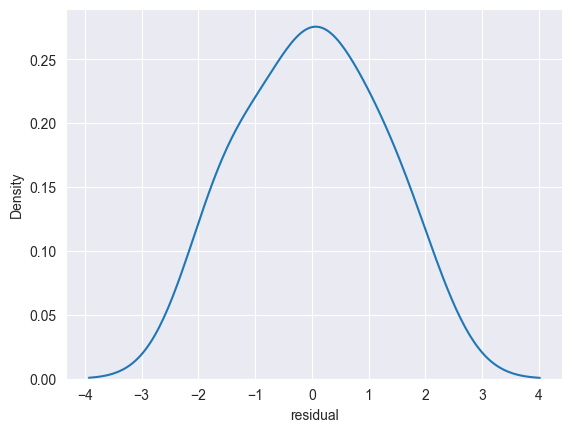

In [51]:
sns.kdeplot(q_3['residual'])

There's a clear pattern in the residuals

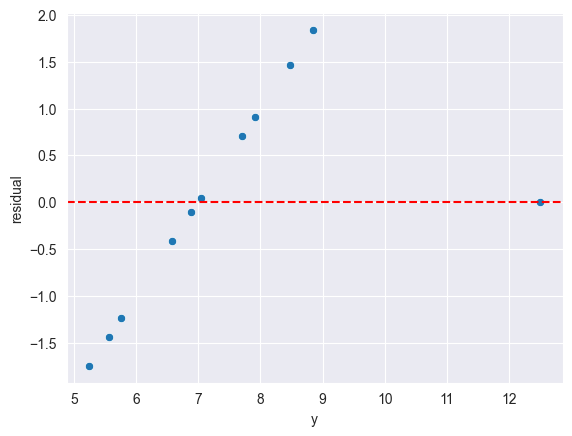

In [52]:
sns.scatterplot(data=q_3,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')